# IMPORT LIBRARY

In [1]:
#IN THIS WE ARE IMPORTING LIBRARY

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,r2_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# LOAD DATASET

In [2]:
#IN THIS WE ARE IMPORTING DATA FROM DEKSTOP AND READING WITH THE HELP OF READ_CSV

df=pd.read_csv("D:\\KAGGLE DATASET\\liver.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# DESCRIPTIVE

In [30]:
#IN THIS WE ARE TRYING TO KNOW ABOUT DATA SH 

df.shape

(583, 9)

In [4]:
#IN THIS WE ARE TRYING TO KNOW ABOUT DATA TYPES 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
# IN THIS WE ARE TRYING TO KNOW ABOUT STATISTIC OF DATA LIKE MEAN,MEDIAN ETC

df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


# CHECKING FOR NULL VALUE IN OUR DATASET

In [6]:
# WITH THE HELP OF VALUE 

df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

<AxesSubplot:title={'center':'CHECKING NULL VALUE WITH THE HELP OF VISULISATION'}>

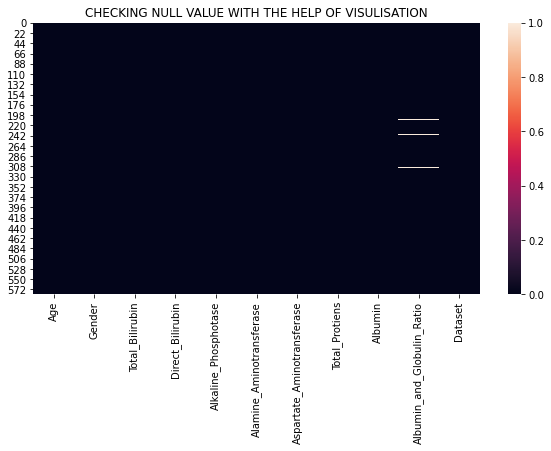

In [7]:
plt.figure(figsize=(10,5))
plt.title('CHECKING NULL VALUE WITH THE HELP OF VISULISATION')
sns.heatmap(df.isnull())

THE ARE ONE COLUMN THAT HAVE NULL VALUE AND THE COLUMN IS Albumin_and_Globulin_Ratio 

<AxesSubplot:title={'center':'CHECKING NULL VALUE WITH THE HELP OF VISULISATION'}>

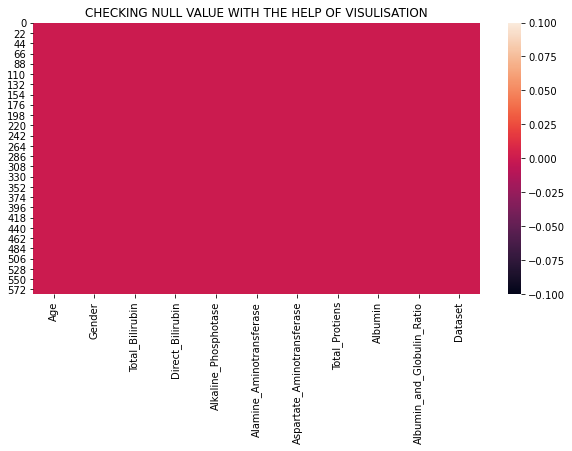

In [8]:
#FILLING THE VALUE WITH MEADIAN 

df['Albumin_and_Globulin_Ratio']=df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median())
plt.figure(figsize=(10,5))
plt.title('CHECKING NULL VALUE WITH THE HELP OF VISULISATION')
sns.heatmap(df.isnull())

AFTER FILLING THE NULL VALUE 

In [9]:
# FINDING THE UNIQUE VALUE OF A COLUMN 

for i in df.columns:
    print(i)
    print(df[i].unique())
    print("===================================================================================================================")
    print(end="\n")

Age
[65 62 58 72 46 26 29 17 55 57 64 74 61 25 38 33 40 51 63 34 20 84 52 30
 48 47 45 42 50 85 35 21 32 31 54 37 66 60 19 75 68 70 49 14 13 18 39 27
 36 24 28 53 15 56 44 41  7 22  8  6  4 43 23 12 69 16 78 11 73 67 10 90]

Gender
['Female' 'Male']

Total_Bilirubin
[ 0.7 10.9  7.3  1.   3.9  1.8  0.9  0.6  2.7  1.1  1.6  2.2  2.9  6.8
  1.9  4.1  6.2  4.   2.6  1.3 14.2  1.4  2.4 18.4  3.1  8.9  0.8  2.8
  2.   5.7  8.6  5.8  5.2  3.8  6.6  0.5  5.3  3.2  1.2 12.7 15.9 18.
 23.  22.7  1.7  3.  11.3  4.7  4.2  3.5  5.9  8.7 11.  11.5  4.5 75.
 22.8 14.1 14.8 10.6  8.   1.5  2.1  6.3  2.3 27.2  2.5  3.6 30.5 16.4
 14.5 18.5 23.2  3.7  3.3  7.1  6.7 22.6  7.5  5.   4.9  8.2  0.4  7.4
 23.3  7.9  3.4 19.8 32.6 17.7 20.  26.3  4.4  9.4 30.8 19.6 15.8  5.5
 20.2 27.7 11.1 10.2 42.8 15.2 16.6 17.3 22.5 16.7  7.7 15.6 12.1 25.
 15. ]

Direct_Bilirubin
[ 0.1  5.5  4.1  0.4  2.   0.7  0.2  0.3  1.3  0.8  0.5  1.   3.   1.9
  1.2  7.8  0.6  1.1  3.2  1.8  8.8  1.6  4.5  2.8  4.   2.7  2.4  1.5
 

In [10]:
#FINDING THE WIETAGE OF A COLUMN

for i in df.columns:
    print(i)
    print(df[i].value_counts(normalize=True))
    print("===================================================================================================================")
    print(end="\n")

Age
60    0.058319
45    0.042882
50    0.039451
38    0.036021
42    0.036021
        ...   
8     0.001715
78    0.001715
84    0.001715
85    0.001715
90    0.001715
Name: Age, Length: 72, dtype: float64

Gender
Male      0.756432
Female    0.243568
Name: Gender, dtype: float64

Total_Bilirubin
0.8     0.156089
0.7     0.132075
0.9     0.097770
0.6     0.078902
1.0     0.048027
          ...   
23.0    0.001715
32.6    0.001715
25.0    0.001715
15.6    0.001715
10.6    0.001715
Name: Total_Bilirubin, Length: 113, dtype: float64

Direct_Bilirubin
0.2     0.332762
0.1     0.108062
0.3     0.087479
0.8     0.037736
0.4     0.036021
          ...   
4.2     0.001715
5.2     0.001715
5.5     0.001715
2.6     0.001715
10.0    0.001715
Name: Direct_Bilirubin, Length: 80, dtype: float64

Alkaline_Phosphotase
198     0.018868
215     0.018868
298     0.018868
195     0.017153
190     0.017153
          ...   
253     0.001715
254     0.001715
1050    0.001715
259     0.001715
1020    0.00171

<AxesSubplot:title={'center':'COUNT PLOT'}, xlabel='Dataset', ylabel='count'>

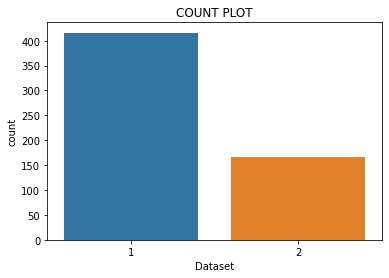

In [11]:
#IN THIS WE ARE CHECKING THE TARGET VALUE DISTRIBUTION 

plt.title('COUNT PLOT')
sns.countplot(df['Dataset'])

AS WE ARE SEEING IN THE DAIGRAM OUR DATA IS NOT BAISED

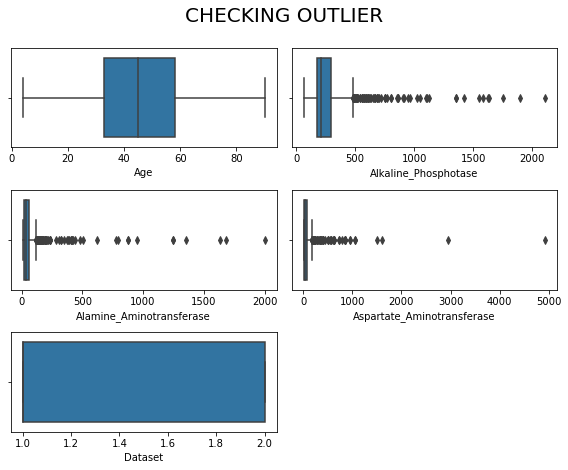

In [12]:
# IN THIS WE CHECKING THE OUTLIER OF EVERY COLUMN WITH  THE HELP OF BOXPLOT

list1=[item for item in df.columns if df[item].dtypes=='int64']
plt.figure(figsize=(8,10))
for i,column in enumerate(list1):
    plt.subplot(len(list1), 2, i+1)
    plt.suptitle("CHECKING OUTLIER", fontsize=20, x=0.5, y=1)
    sns.boxplot(df[column])
    plt.tight_layout()

AS WE ARE SEEING IN THE BOXPLOT THERE ARE ONLY THREE COLUMNS THAT HAVE OUTLIERS THAT IS Alamine_Aminotransferase,Aspartate_Aminotransferase AND Alkaline_Phosphotase

# DATA LABELING

In [13]:
#IN THIS SHELL WE ARE CONVERTING THE CATEGORIAL DATA INTO NUMBERICAL WITH THE HELP LABEL EMCODER

list1=[item for item in df.columns if df[item].dtypes=='object']
le=LabelEncoder()
for i in list1:
    df[i]=le.fit_transform(df[i])

In [29]:
#now data look like this

df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,0.90,1
1,62,1,10.9,5.5,699,64,100,0.74,1
2,62,1,7.3,4.1,490,60,68,0.89,1
3,58,1,1.0,0.4,182,14,20,1.00,1
4,72,1,3.9,2.0,195,27,59,0.40,1


# DAIGNOSIS ANALYSIS OR DATA VISUALISATION

<AxesSubplot:>

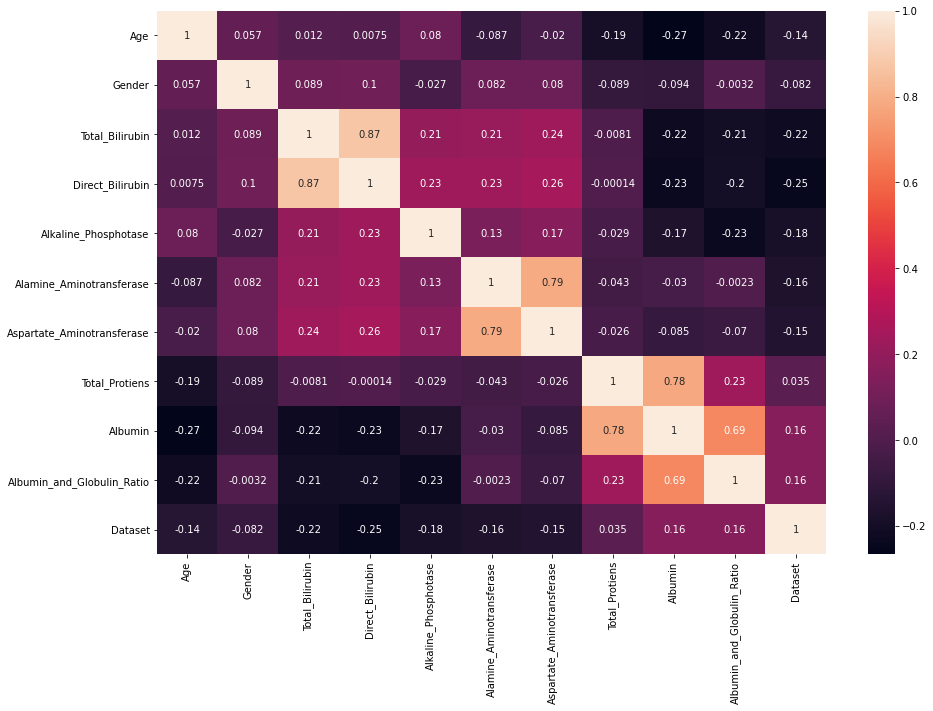

In [15]:
#IN THIS WE ARE FINDING THE CORRELATION OF COLUMN FOR FEATURE SCALING 

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

IN THE ABOVE FIGURE THERE IS NO COLUMN THAT HAVE HIGHLY CORRELATION OR LESS CORRELATION

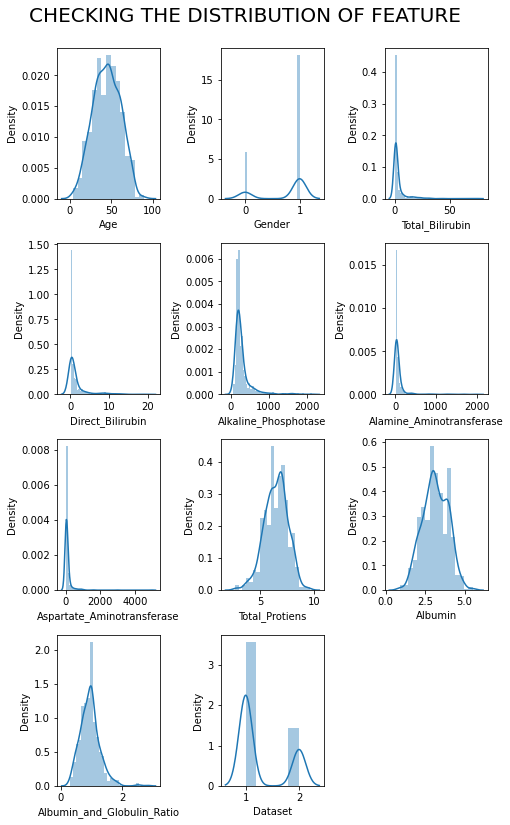

In [16]:
#IN THIS WE ARE CHECKING THAT OUR DATA IS NORMAL DISTRIBUTIVE OR NOT 

list1=list(df.columns)
plt.figure(figsize=(7,30))
for i,column in enumerate(list1):
    plt.subplot(len(list1), 3, i+1)
    plt.suptitle("CHECKING THE DISTRIBUTION OF FEATURE ", fontsize=20, x=0.5, y=1)
    sns.distplot(df[column])
    plt.tight_layout()

AS WE ARE SEEING IN ABOVE DISTPLOT THERE ARE SOME NORMAL DISTRIBUTION AND SOME ARE SKEWED DATA

# FEATURE SELECTION

In [17]:
#IN THIS WE ARE DOING FEATURE SELECTION FOR TAKING IMPORTANT FEATURE FROM DATASET ON THE BASIS OF VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data['feature']=df.columns
vif_data['VIF']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif_data.sort_values('VIF',ascending=False)

,feature,VIF
8,Albumin,134.897777
7,Total_Protiens,110.557763
9,Albumin_and_Globulin_Ratio,27.086265
10,Dataset,8.688549
0,Age,7.848290
3,Direct_Bilirubin,5.799284
2,Total_Bilirubin,5.480223
1,Gender,4.091674
5,Alamine_Aminotransferase,3.312987
6,Aspartate_Aminotransferase,3.193184


AS WE ARE SEEING IN OUR ABOVE TABLE Total_Protiens AND Albumin HAVE HIGH VARIANCE

In [18]:
#IN THIS WE ARE DOING OLS MODEL FOR FEATURE SELECTION OM THE BASIS OF P VALUE  

import statsmodels.api as sm
import statsmodels.formula.api as smf
olsmodel = smf.ols(formula='Dataset~Age+Gender+Total_Bilirubin+Direct_Bilirubin+Alkaline_Phosphotase+Alamine_Aminotransferase++Aspartate_Aminotransferase+Total_Protiens+Albumin+Albumin_and_Globulin_Ratio',data=df).fit()
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Dataset   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     7.813
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           8.37e-12
Time:                        21:52:05   Log-Likelihood:                -327.11
No. Observations:                 583   AIC:                             676.2
Df Residuals:                     572   BIC:                             724.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.6913      0.162     10.425      0.000       1.373       2.010
Age                           -0.0032      0.001     -2.804      0.005      -0.005      -0.001
Gender                        -0.0510      0.042     -1.214      0.225      -0.133       0.032
Total_Bilirubin               -0.0001      0.006     -0.023      0.982      -0.012       0.011
Direct_Bilirubin              -0.0225      0.013     -1.677      0.094      -0.049       0.004
Alkaline_Phosphotase          -0.0002   7.74e-05     -2.517      0.012      -0.000   -4.28e-05
Alamine_Aminotransferase      -0.0004      0.000     -2.367      0.018      -0.001   -6.57e-05
Aspartate_Aminotransferase  6.355e-05      0.000      0.617      0.537      -0.000       0.000
Total_Protiens                -0.0761      0.039     -1.975      0.049      -0.152      -0.000
Albumin                        0.1392      0.071      1.962      0.050      -0.000       0.279
Albumin_and_Globulin_Ratio    -0.0547      0.107     -0.512      0.609      -0.265       0.155
==============================================================================
Omnibus:                      343.354   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.235
Skew:                           0.689   Prob(JB):                     6.23e-18
Kurtosis:                       1.833   Cond. No.                     4.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

IN THIS ABOUVE TABLE WE CAN EASILY FIND THE IMPORTANT FEATURE WITH THE HELP OF P COLUMN

In [19]:
# AS WE ARE SEEING IN THE TABLE TWO COLUMNS HAVE HIGH VARIANCE

df.drop('Albumin',axis=1,inplace=True)
df.drop('Total_Protiens',axis=1,inplace=True)

# PREPARING DATA FOR TRAINING THE MODEL

In [20]:
#IN THIS WE ARE SEPERATING THE DATA FRAME BY DROPPING THE TARGET FEATURE 

X=df.drop('Dataset',axis=1)
Y=df['Dataset']
print(X.shape)
print(Y.shape)

(583, 8)
(583,)


# STANDARDIZATION

In [21]:
# IH THIS SHELL WE ARE DOING FEATURE SCALING AND CONVERTING THE RANGE OF [-1,1] WITH THE HELP OF StandardScaler()

SS=StandardScaler()
SS.fit_transform(X,Y)

array([[ 1.25209764, -1.76228085, -0.41887783, ..., -0.35466541,
        -0.31839333, -0.14752863],
       [ 1.06663704,  0.56744644,  1.22517135, ..., -0.09159933,
        -0.03433257, -0.65032257],
       [ 1.06663704,  0.56744644,  0.6449187 , ..., -0.11352151,
        -0.14518555, -0.17895325],
       ...,
       [ 0.44843504,  0.56744644, -0.4027597 , ..., -0.17928803,
        -0.21100451,  0.16671759],
       [-0.84978917,  0.56744644, -0.32216906, ..., -0.28341834,
        -0.26989515,  0.16671759],
       [-0.41704777,  0.56744644, -0.37052344, ..., -0.32726269,
        -0.2976084 ,  1.73794867]])

# DIVIDING THE DATA INTO TRAIN AND TEST

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7,random_state=31)
print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_train.shape)

(408, 8)
(175, 8)
(175,)
(408,)


In [23]:
#IN THIS WE ARE PREPARING THE DATA INTO TWO FORM TRAIN AND TEST. TRAIN IS FOR TRAINING THE DATA TEST IS FOR TESTING THE DATA 

Logreg = RandomForestClassifier()
Logreg.fit(X_train,Y_train)
Y_pred = Logreg.predict(X_test)
accuracy_score(Y_test,Y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
TP = cm[0,0]
TN = cm[0,1]
FP = cm[1,0]
FN = cm[1,1]
print('TP:',TP ,'\nTN:',TN,'\nFP:',FP,'\nFN:', FN)
print('Presicion Score is: ',precision_score(Y_test,Y_pred))
print('Recall score is:',recall_score(Y_test,Y_pred))
print('Accuaracy Score is:',accuracy_score(Y_test,Y_pred))

TP: 106 
TN: 16 
FP: 39 
FN: 14
Presicion Score is:  0.7310344827586207
Recall score is: 0.8688524590163934
Accuaracy Score is: 0.6857142857142857


In [24]:
Logreg = XGBClassifier()
Logreg.fit(X_train,Y_train)
Y_pred = Logreg.predict(X_test)
accuracy_score(Y_test,Y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
TP = cm[0,0]
TN = cm[0,1]
FP = cm[1,0]
FN = cm[1,1]
print('TP:',TP ,'\nTN:',TN,'\nFP:',FP,'\nFN:', FN)
print('Presicion Score is: ',precision_score(Y_test,Y_pred))
print('Recall score is:',recall_score(Y_test,Y_pred))
print('Accuaracy Score is:',accuracy_score(Y_test,Y_pred))

[21:52:06] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
TP: 101 
TN: 21 
FP: 28 
FN: 25
Presicion Score is:  0.7829457364341085
Recall score is: 0.8278688524590164
Accuaracy Score is: 0.72


# AS WE ARE SEEING THAT WE HAVE OUTLIER SO WE CAN PERFORMING NORMALIZATION

In [25]:
# FOR NORMALIZATION WE ARE USING MINMAXSCALER

from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
MM.fit_transform(X_train,Y_train)

array([[0.80232558, 1.        , 0.01876676, ..., 0.00502513, 0.00670868,
        0.2       ],
       [0.52325581, 1.        , 0.0080429 , ..., 0.01909548, 0.00975808,
        0.28      ],
       [0.69767442, 1.        , 0.01340483, ..., 0.01055276, 0.01484041,
        0.08      ],
       ...,
       [0.70930233, 1.        , 0.00938338, ..., 0.01909548, 0.0060988 ,
        0.36      ],
       [0.18604651, 1.        , 0.00938338, ..., 0.00502513, 0.00406587,
        0.26      ],
       [0.39534884, 1.        , 0.01876676, ..., 0.07939698, 0.08761943,
        0.4       ]])

In [26]:
Logreg = XGBClassifier()
Logreg.fit(X_train,Y_train)
Y_pred = Logreg.predict(X_test)
accuracy_score(Y_test,Y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
TP = cm[0,0]
TN = cm[0,1]
FP = cm[1,0]
FN = cm[1,1]
print('TP:',TP ,'\nTN:',TN,'\nFP:',FP,'\nFN:', FN)
print('Presicion Score is: ',precision_score(Y_test,Y_pred))
print('Recall score is:',recall_score(Y_test,Y_pred))
print('Accuaracy Score is:',accuracy_score(Y_test,Y_pred))

[21:52:06] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
TP: 101 
TN: 21 
FP: 28 
FN: 25
Presicion Score is:  0.7829457364341085
Recall score is: 0.8278688524590164
Accuaracy Score is: 0.72


AFTER PERFORMING NORMALIZATION OUR ACCURACY REMAINS CONSTANT

# SAVING THE MODEL

In [27]:
import pickle
pickle.dump(Logreg, open('kidney.pickle', 'wb'))
kidney_model = pickle.load(open('kidney.pickle', 'rb'))